[ 8.47273644 10.85067114 10.14943233  9.3425354  10.8850233   9.05504769
 11.47752754  9.44831735  8.08339296  8.18540828 10.54379341 11.83304802
 11.12457643 10.23845343 10.87063353 10.03559073 10.90397166 10.4289654
  9.92516992 10.80849728 11.43121892 11.34549764  9.08858399 10.11715336
  7.23805639  9.0454383   8.90755897 11.22228114  9.45313117  8.89643445
  8.754514    9.97260178 11.16155336  9.18972171  8.96766134  8.76333682
 11.06613932 10.20390184  9.19511154  8.48413329 10.84828951  8.63036958
 11.89172643 10.80218169 10.4045351   9.4811556  11.2052263  10.04958587
 10.40051179  9.77088963  9.16452155  9.08696803 11.48529921 10.89594331
 10.05494334 10.54266374  8.74455166  9.88167264 10.10185456  9.50162691
  9.63892812 10.30470525  8.7637192  11.95316267 10.57931594  8.28821483
  9.54843207 11.99453803  9.89224149 11.34698866  9.53664819 11.26676643
 10.54378566  9.75487795 10.27589707 12.07408009 10.7842616  10.53846439
 10.10310095 11.67918784 11.35028114 10.06308538  8.

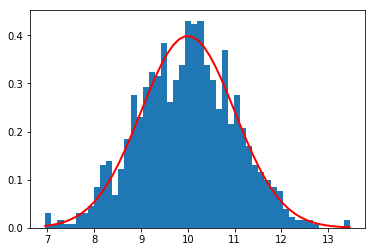

In [263]:
#Question2 on Stochastic gradient descent

#Part A : Data sampling

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# this is how data can be generated
mean =10
std = 1
data_sample = np.random.normal(mean,std,1000)
print(data_sample)
count, bins, ignored = plt.hist(data_sample, 50, normed=True) 
print(count)
print(bins)
print(ignored)
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *
          np.exp( - (bins - mean)**2 / (2 * std**2) ), 
          linewidth=2, color='r') 
plt.show() 

In [264]:
# Data generated here

# million data points normally distributed
data_size = int(1e6)
m = data_size
x1_list = np.random.normal(3,np.sqrt(4),data_size)
x2_list = np.random.normal(-1,np.sqrt(4),data_size)
noise_list = np.random.normal(0,np.sqrt(2),data_size)
print(noise_list[:10])

# x1_list = sorted(x1_list,key=float)
# pdf1 = stats.norm.pdf(x1_list,3,2)
# x2_list = sorted(x2_list,key=float)
# pdf2 = stats.norm.pdf(x2_list,-1,2)
# noise_list = sorted(noise_list,key=float)
# pdf3 = stats.norm.pdf(noise_list,0,np.sqrt(2))


# plt.plot(x1_list,pdf1)
# plt.plot(x2_list,pdf2)
# plt.plot(noise_list,pdf3)



[-1.99894024  0.4643859   0.34512195 -0.05774727 -0.78345904  1.65949723
  0.31934553  1.35277598  0.93267786  0.12602396]


[[ 5.52153146]
 [11.05322352]
 [ 2.91401872]
 [ 7.00797822]
 [ 3.26635909]
 [ 2.16422837]
 [ 5.84640677]
 [ 6.12201823]
 [ 1.14820145]
 [ 5.11076295]]


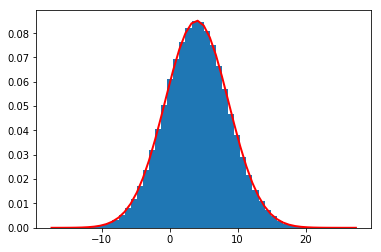

In [265]:
# given theta_vector and x1 and x2 vectors , lets try to see the distribution of yi with error vector 

# 3x1
theta = np.array([[ 3,1,2 ]])
theta = theta.T

# mx1
epsilon = np.array([noise_list])
epsilon = epsilon.T           

# method to add rows in matrix
#theta = np.vstack((theta,np.array([[4]])))
#theta.shape


# mx3
x_vector = np.array([[ 1,x1_list[0], x2_list[0] ]])

# takes a lot of time to append for million data points
#--------------------------------------
# for i in range(len(x1_list)-1):
#     new_sample = np.array([[ 1 , x1_list[i+1], x2_list[i+1]    ]])
#     x_vector = np.vstack( ( x_vector , new_sample ) )

# print(x_vector.shape)    

# y_vector = np.matmul(x_vector,theta) + epsilon
#-----------------------------------------------------



# approach 2, still takes time but lesser
# y_list =[]
# for i in range(len(x1_list)):
#     y_list.append(  theta[0][0]*1 + theta[1][0]*x1_list[i] + theta[2][0]*x2_list[i] + epsilon[i][0]   )

# y_vector = np.array([y_list])
# y_vector = y_vector.T
#--------------------------------------------------------------------


#Approach3 : column appending

x_vector = np.ones((int(1e6),1))

x1_vector = np.array([x1_list])
x1_vector = x1_vector.T

x2_vector = np.array([x2_list])
x2_vector = x2_vector.T

x_vector = np.append( x_vector, x1_vector,axis = 1 )

x_vector = np.append( x_vector, x2_vector,axis = 1 )
y_vector = np.matmul(x_vector,theta) + epsilon




print(y_vector[:10])


mean = np.mean(y_vector)
std = np.std(y_vector)

count, bins, ignored = plt.hist(y_vector, 50, normed=True) 
# print(count)
# print(bins)
# print(ignored)
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *
          np.exp( - (bins - mean)**2 / (2 * std**2) ), 
          linewidth=2, color='r') 
plt.show() 
# it also seems to follow normal distribution with mean (theta.T*X)


In [266]:
def grad_J_theta(x_vec,y_vec,theta):  # X : mx3   ,  Y : mx1   , theta : 3x1
    
    abs_error =  y_vec - (x_vec @ theta)
    #print(abs_error)
    delta = abs_error.T @ x_vec     # matrix multiplication summation happening here
    delta = delta.T
    cost = (1.0/(2*len(x_vec)))* ( abs_error.T @ abs_error  )
    cost = cost[0][0]
    return delta/len(x_vec)
    


In [267]:
def cost(x_vec,y_vec,theta):
    abs_error =  y_vec - (x_vec @ theta)
    #cost = (1.0/(2*len(x_vec)))* ( abs_error.T @ abs_error  )
    cost = (1.0/2)* ( abs_error.T @ abs_error  )
    return cost[0][0]

In [268]:
#------------------------ STOCHASTIC GRADIENT DESCENT--------------------------------------------------

# x_vector  : mx3
# y_vector  : mx1

#Initialize theta
theta = np.zeros(3).reshape(3,1)

#batch_size = 1000
learning_rate = 0.001


#Shuffle the data
x_y_vector = np.append(x_vector,y_vector,axis = 1)
np.random.shuffle(x_y_vector)          # taking time



    


In [269]:
# # Shuffled vectors
# x_vector = x_y_vector[:,:3]
# y_vector = x_y_vector[:,3:4]

# # print(x_vector[:10],y_vector[:10])

# b=0
# xb = x_vector[ b*batch_size : (b+1)*batch_size ]
# yb = y_vector[ b*batch_size : (b+1)*batch_size ]

# prev_cost, delta  =  grad_J_theta(xb,yb,theta)
# #  print(prev_cost,delta)
# theta += learning_rate*delta
# curr_cost, delta  =  grad_J_theta(xb,yb,theta)
# print(prev_cost-curr_cost)
# for i in range(1000):
    
#     if abs(prev_cost - curr_cost) < 1e-10:
#         break
#     for b in range(total_batches):
#         # batch number b's data
#         if abs(prev_cost - curr_cost) < 1e-10:
#             break
#         xb = x_vector[ b*batch_size : (b+1)*batch_size ]
#         yb = y_vector[ b*batch_size : (b+1)*batch_size ]
        
#         prev_cost = curr_cost
        
#         theta += learning_rate* delta
#         curr_cost, delta = grad_J_theta(xb,yb,theta) 
#         #print(b,prev_cost,curr_cost)
#         print(theta.T)
        
        
        

In [270]:
# # Shuffled vectors
# x_vector = x_y_vector[:,:3]
# y_vector = x_y_vector[:,3:4]
# #print(x_vector[:10],y_vector[:10])

# b = 0
# xb = x_vector[ b*batch_size : (b+1)*batch_size ]
# yb = y_vector[ b*batch_size : (b+1)*batch_size ]
# prev_cost ,delta  = grad_J_theta(xb,yb,theta)
# print(theta.T,prev_cost)

# theta += learning_rate* delta

# curr_cost, delta = grad_J_theta(xb,yb,theta) 
# print(theta.T,curr_cost)        
    
    
    
# converged = False 
# count = 0 
# while converged == False :
# #     if abs(prev_cost - curr_cost) < 1e-7:
# #         converged = True
# #         print(theta.T,curr_cost,count,converged)
    

#     for b in range(total_batches):
# #         if abs(prev_cost - curr_cost) < 1e-7:
# #             converged = True
# #             print(theta.T,curr_cost,count)

        
        
#         xb = x_vector[ b*batch_size : (b+1)*batch_size ]
#         yb = y_vector[ b*batch_size : (b+1)*batch_size ]
#         curr_cost += cost(xb, yb theta)
        
#         theta += learning_rate* grad_J_theta(xb,yb,theta) 
        
        
        
#         count = count+batch_size
        
#         if count%1000 == 0 : 
            
#             curr_avg_cost = count/batch_size 
#             if abs(prev_avg_cost - curr_avg_cost) < 1e-3:
#                 converged = True
#             prev_avg_cost = curr_avg_cost
#             curr_avg_cost = 0
#             print(theta.T, count/batch_size)
        
        
        
# #         curr_cost = cost(xb,yb,theta) 
# #         curr_cost = cost(x_vector,y_vector,theta) 
# #         count+=1
# #         print(theta.T,curr_cost,count,converged)


In [271]:
converged = False 
prev_cost = 99999
curr_cost = 0
avg_over = 5000
batch_size = 100   # Note re initialized
examples = 0
total_cost = 0
total_batches = m//batch_size     # to handle boundry case



while converged == False :
    b = 0
    for b in range(total_batches):
        
        xb = x_vector[ b*batch_size : (b+1)*batch_size ]
        yb = y_vector[ b*batch_size : (b+1)*batch_size ]
        
        #print(len(xb),b)
        total_cost += cost(xb,yb,theta)
        #print(total_cost)
        examples += batch_size
        
        theta += learning_rate* grad_J_theta(xb,yb,theta)
        
        if examples%avg_over == 0 :
            curr_cost = total_cost/( avg_over/batch_size )        # total cost / no. of itrs
            print(theta.T,curr_cost,abs(prev_cost - curr_cost))
            if abs(prev_cost - curr_cost) < 1e-3:
                converged = True
                break
            else:
                prev_cost = curr_cost
                curr_cost = 0
                total_cost = 0
                examples = 0
            
        





[[0.15499433 0.58897809 0.2282419 ]] 1397.3968127685393 98601.60318723146
[[0.24644972 0.91647124 0.463824  ]] 832.9136825913802 564.4831301771592
[[0.30956875 1.10320649 0.68827533]] 583.4982889911463 249.41539360023387
[[0.35634551 1.20437642 0.87996751]] 444.3741201344446 139.12416885670171
[[0.3988173  1.28007093 1.04241498]] 355.7372500611602 88.6368700732844
[[0.43601488 1.33093054 1.18444552]] 307.14580154442604 48.59144851673415
[[0.469766   1.35876166 1.30271361]] 268.78205353183796 38.363748012588076
[[0.50657021 1.38871161 1.3965303 ]] 245.21483603363617 23.567217498201785
[[0.54191756 1.41851882 1.47102837]] 212.14476785766277 33.070068175973404
[[0.57456604 1.43235919 1.53160389]] 195.72202093432404 16.422746923338735
[[0.60625648 1.44498608 1.5892901 ]] 196.14774457987798 0.42572364555394415
[[0.63918873 1.4527597  1.63925749]] 192.8633710775195 3.284373502358477
[[0.67109861 1.45862108 1.67955342]] 183.9224647352356 8.94090634228391
[[0.70095183 1.45581932 1.71223312]] 1

[[2.53645807 1.09833464 1.95849527]] 102.0199990524204 3.816096206218944
[[2.54256466 1.09779566 1.95948793]] 103.00646266916965 0.9864636167492478
[[2.54817575 1.09608958 1.96048775]] 98.57446343683515 4.431999232334505
[[2.55334312 1.09291894 1.96243076]] 103.63173571951803 5.057272282682888
[[2.55995227 1.09357719 1.96215336]] 102.09399972670545 1.5377359928125856
[[2.56635883 1.0913012  1.96609201]] 100.95488637930497 1.1391133474004818
[[2.57301848 1.08912877 1.9641231 ]] 103.36106679510505 2.4061804158000797
[[2.5789099  1.08959089 1.96465244]] 100.98053202617733 2.380534768927717
[[2.58453354 1.08891424 1.96629375]] 101.33387777857031 0.3533457523929826
[[2.58995353 1.08673926 1.96622098]] 105.14743621160224 3.813558433031929
[[2.59539623 1.08365484 1.96757923]] 102.72141775749002 2.4260184541122243
[[2.60161698 1.0913527  1.96730042]] 101.69695448005969 1.0244632774303284
[[2.60614323 1.08829879 1.97114991]] 101.73338242248114 0.03642794242145442
[[2.61342373 1.09143353 1.96724

[[2.91262593 1.01873352 1.99980787]] 99.97036498284821 0.4461038609493073
[[2.91530859 1.02077491 1.99782136]] 101.49805791682428 1.5276929339760699
[[2.91601934 1.016581   1.99519931]] 100.78860681280939 0.7094511040148888
[[2.91795408 1.01828605 1.99383102]] 98.66765725475841 2.120949558050981
[[2.91918102 1.01707673 1.99353184]] 99.22072529905792 0.5530680442995077
[[2.92098837 1.01737985 1.99259382]] 98.90935884240344 0.3113664566544827
[[2.92124023 1.01505276 1.99154536]] 101.51335024872708 2.603991406323644
[[2.9216126  1.01354778 1.99162281]] 102.66166166221178 1.1483114134847057
[[2.92492993 1.02010545 1.99070876]] 104.7076323227308 2.0459706605190178
[[2.92510183 1.01785413 1.99147444]] 98.84745562211909 5.860176700611717
[[2.92731552 1.0192518  1.99175264]] 104.09938112538084 5.251925503261759
[[2.92686559 1.01333082 1.99299164]] 100.71438212506595 3.3849990003148918
[[2.9286476  1.01685128 1.99316544]] 102.88833451469476 2.173952389628809
[[2.92919707 1.01513695 1.99399524]]

[[2.97986648 1.00746838 1.99778287]] 98.93882568584355 0.08320846777185409
[[2.97866076 1.00130201 2.0004559 ]] 96.79833296028454 2.140492725559014
[[2.97986922 1.00310984 1.99688886]] 102.32283138130653 5.524498421021988
[[2.97997285 1.0003778  1.99752553]] 102.61292437232359 0.29009299101706176
[[2.98074837 1.00278019 1.99836278]] 101.62701883979966 0.9859055325239297
[[2.98020494 0.9997318  1.99820728]] 100.30117568909172 1.3258431507079393
[[2.98107988 1.00035297 1.99845592]] 100.45406874915501 0.15289306006329184
[[2.98016385 0.99767934 2.00154796]] 102.32117584795535 1.8671070988003322
[[2.98114058 0.9993603  2.00021289]] 98.469998271811 3.8511775761443516
[[2.98200945 1.00181645 2.00080282]] 97.01638070778034 1.453617564030651
[[2.98345127 1.00449672 1.99783045]] 100.9671424433219 3.950761735541562
[[2.98316594 1.00209314 1.99479922]] 101.30658189357987 0.33943945025797007
[[2.98401458 1.00146976 1.99629497]] 98.93686566446824 2.3697162291116314
[[2.98228111 0.9975841  1.9995443

[[2.99813782 1.00444573 2.00321881]] 98.19714768098267 0.9013776983408235
[[2.99755378 1.00167191 2.00698373]] 97.16249664504936 1.034651035933308
[[2.99903257 1.00183782 2.00616579]] 101.44320544214762 4.2807087970982565
[[2.99967838 1.00445362 2.00503201]] 99.47889555181851 1.9643098903291047
[[2.998597   1.00165441 2.00533057]] 98.47147774428844 1.007417807530075
[[2.99840716 1.00093304 2.00506381]] 100.06878209819955 1.5973043539111131
[[2.99893192 1.00476175 2.00301477]] 99.53259737616827 0.5361847220312796
[[2.99787795 1.00266437 1.99957739]] 100.36050740022087 0.8279100240525992
[[2.99726516 1.00060132 1.9999063 ]] 100.93044337834073 0.5699359781198581
[[2.99748061 1.00091539 2.00018669]] 97.20968288059954 3.720760497741182
[[2.99712013 0.99909627 2.00151616]] 97.472158531194 0.2624756505944532
[[2.99745265 0.99929945 2.00412245]] 96.65251810586973 0.8196404253242662
[[2.99832934 0.99970886 2.00198542]] 99.10830554172766 2.4557874358579284
[[2.99811386 1.00074635 2.00259582]] 10

[[3.00114627 0.99951776 1.99534092]] 99.6197361976697 2.0767856651205676
[[3.00072543 0.99737267 1.99675242]] 101.48388940273489 1.8641532050651932
[[3.00062993 0.99783384 1.99548067]] 95.94325364460332 5.540635758131572
[[3.00096543 0.99878729 1.99632131]] 99.85862896189266 3.915375317289346
[[2.99978572 0.99356307 1.99964974]] 101.69100474410614 1.8323757822134752
[[3.0008068  0.9937011  1.99929203]] 100.67597659951969 1.0150281445864522
[[3.00150976 0.99992847 1.99627817]] 96.93200603322707 3.7439705662926173
[[3.00183092 1.00194912 1.99290982]] 93.70269489897527 3.2293111342518017
[[3.00046489 0.99939685 1.99594627]] 101.13370420783176 7.431009308856488
[[3.00008949 0.99823398 1.9967787 ]] 99.00471475233519 2.1289894554965656
[[2.99881166 0.99819369 1.99995368]] 99.97675030488459 0.9720355525494
[[2.99799583 0.99746499 2.00209433]] 100.42154024119598 0.44478993631139474
[[2.99848974 1.00077896 2.00138484]] 97.40062526643365 3.0209149747623343
[[2.99917966 1.00390102 2.00049641]] 10

[[3.00041898 0.99886438 1.99763442]] 97.99636911093205 0.3855972112762487
[[2.99980596 0.99897576 1.99458129]] 101.24763988366631 3.2512707727342587
[[2.99928744 0.99770014 1.99844889]] 103.13427195341156 1.8866320697452466
[[2.99919795 0.99311094 1.9972397 ]] 96.62997908588342 6.504292867528136
[[3.00064114 1.00189841 1.99280545]] 103.39933668963225 6.76935760374883
[[2.99899995 0.99695415 1.99272042]] 99.45128138614773 3.948055303484523
[[2.99898771 0.99791741 1.99298521]] 100.20835470211556 0.7570733159678298
[[2.99843048 0.99729406 1.99327712]] 96.0064536953732 4.201901006742361
[[2.99773274 0.99593679 1.99444395]] 101.09270496892488 5.086251273551682
[[2.99838522 0.99851418 1.99348946]] 99.23936784921352 1.8533371197113553
[[2.99867338 0.99702536 1.99721748]] 97.44069542864462 1.7986724205689057
[[2.99948794 0.99631081 1.99468327]] 100.02254709832057 2.581851669675956
[[2.99948393 0.99774599 1.99496234]] 98.63563757083548 1.3869095274850878
[[2.99942763 0.99818968 1.99624352]] 98.

[[3.0019787  0.99726421 2.00281196]] 95.89077049438148 2.9629802076739225
[[3.00277515 0.99906516 2.00102344]] 99.88871644744509 3.9979459530636063
[[3.0028318  1.00174547 2.00198914]] 100.98743249396114 1.0987160465160457
[[3.00319632 1.000995   2.00320365]] 103.02610699456098 2.0386745005998392
[[3.00382716 1.0031227  2.00124934]] 99.12402964321862 3.9020773513423563
[[3.00206189 0.9993295  2.00267232]] 97.21685154745866 1.90717809575996
[[3.00163453 0.99764539 2.00750944]] 100.24315232194093 3.026300774482266
[[3.00189392 0.99923627 2.00622837]] 99.8885514985754 0.35460082336553
[[3.00335494 1.00151604 2.00423065]] 101.23952486711514 1.3509733685397407
[[3.00289233 0.997623   2.00147315]] 100.6465392920753 0.5929855750398332
[[3.00365839 0.99958329 2.00004418]] 98.52114641313254 2.125392878942762
[[3.00369173 0.99861783 1.99970689]] 99.07727149822354 0.5561250850909971
[[3.00431629 0.9990719  1.99866529]] 98.73047724223302 0.34679425599051683
[[3.00339024 0.99707443 1.99762915]] 101

[[2.99660714 0.99600372 2.00132601]] 98.45753743827947 3.870685915793871
[[2.9972638  0.99849495 2.00191417]] 97.00822542946575 1.4493120088137204
[[2.99850698 1.00120681 1.99891116]] 100.95105032973017 3.9428249002644122
[[2.99801501 0.99885273 1.99587818]] 101.30909763321205 0.3580473034818823
[[2.99866412 0.99827116 1.99735664]] 98.907739952547 2.4013576806650434
[[2.99673316 0.99442325 2.0005823 ]] 97.0249479412911 1.8827920112559013
[[2.99729274 0.99766651 1.99861179]] 95.8810229840867 1.1439249572044048
[[2.99733778 0.99598871 1.99897711]] 100.60493318232842 4.723910198241725
[[2.99658951 0.99153965 2.00092634]] 99.3475831362171 1.257350046111327
[[2.99829702 0.99658918 1.99773908]] 98.68399783766809 0.6635852985490089
[[2.99886872 0.99770164 1.99684056]] 102.63254632773364 3.948548490065548
[[2.99814501 0.99412624 1.99973778]] 96.09823119355205 6.534315134181583
[[2.99855051 0.9963116  1.99854491]] 95.96928113487256 0.12895005867949294
[[2.99839805 0.99477842 1.99697696]] 98.756

[[2.99861418 0.99816321 2.00071158]] 101.89971242547809 1.8823156167888726
[[2.99799891 0.99526775 1.99834108]] 98.73899765620745 3.1607147692706405
[[2.9982751  0.99573283 1.99773972]] 97.46148700184831 1.2775106543591335
[[2.99989375 1.00137956 1.99443765]] 100.9208891088878 3.4594021070394945
[[2.99953436 0.99631533 1.99547085]] 98.1917222175851 2.729166891302711
[[3.00009899 0.99957414 1.99606068]] 99.05740528572623 0.8656830681411378
[[2.9999027  1.00021135 1.99756961]] 96.3955604403349 2.661844845391329
[[3.00011683 1.00230851 1.99937009]] 99.95743987722855 3.5618794368936477
[[2.99967545 0.99722528 2.000648  ]] 101.01948737797909 1.0620475007505377
[[3.00058368 1.00122647 2.00040319]] 103.03121790036629 2.0117305223871966
[[2.99859244 0.99387467 2.00132043]] 100.46823855890509 2.562979341461201
[[2.99859272 0.99929677 2.00330379]] 99.39570617654871 1.0725323823563713
[[2.99906158 0.9967918  2.00334083]] 97.32133505675418 2.0743711197945345
[[2.99805348 0.99566967 2.00355694]] 10

[[3.00004658 0.99893084 2.00714448]] 102.49110679276353 1.4951377564560602
[[3.00145743 1.00257253 2.00342132]] 101.46896626866378 1.022140524099754
[[3.00217253 1.00200545 2.004271  ]] 99.90121284709947 1.567753421564305
[[3.00224092 1.00366661 2.00209982]] 101.26138925721263 1.360176410113155
[[3.00268394 1.00534778 2.00249758]] 95.9418649885334 5.319524268679231
[[3.00140199 1.00170679 2.00353933]] 100.30440566748646 4.362540678953067
[[3.00078847 0.99917607 2.00330736]] 97.91413906312042 2.3902666043660474
[[3.00133261 1.00048352 2.00361535]] 102.04211900046067 4.127979937340257
[[3.00272897 1.00319514 2.00257432]] 98.80845949686862 3.233659503592051
[[3.00205849 1.00090576 1.99858665]] 98.16742816463515 0.6410313322334673
[[3.00249014 1.00141656 2.00051507]] 99.64601458209712 1.478586417461969
[[3.00215927 0.99972447 1.99788067]] 97.96555235263753 1.680462229459593
[[3.003757   1.0049216  1.99868318]] 97.5779455881894 0.3876067644481367
[[3.00206069 1.00001046 1.9994433 ]] 98.2780

[[2.99718599 0.99234703 1.99720437]] 101.28679136895217 3.485769912084791
[[2.99850771 0.99651984 1.99564027]] 98.53691731780856 2.749874051143607
[[2.99852236 0.99738171 1.99699024]] 98.92219356878371 0.38527625097515283
[[2.99810818 0.99826802 1.99854794]] 100.62333275373683 1.7011391849531208
[[2.9976197  0.99807726 1.99934045]] 99.25140402801823 1.371928725718604
[[2.9974782  1.00011108 2.00029381]] 102.27227244845604 3.0208684204378073
[[2.99776602 0.99846433 1.99930298]] 99.12513208569634 3.1471403627597
[[2.99686813 0.99860394 2.00467651]] 102.06080951046938 2.935677424773047
[[2.99629896 0.99562172 1.99903186]] 103.69358764387664 1.6327781334072569
[[2.99651596 0.99534713 1.99960216]] 101.90602338993125 1.7875642539453906
[[2.9972656  0.99569566 1.99981166]] 101.39424019988728 0.5117831900439711
[[2.99797584 0.99778658 2.00033341]] 97.84956231153637 3.544677888350904
[[2.99680709 0.99349056 2.00103855]] 100.65478519661546 2.8052228850790897
[[2.99791893 0.99745849 1.99968193]] 

[[3.00526928 1.0016976  2.00153328]] 97.76102541267814 0.572862389183598
[[3.00425999 0.99804358 2.00308907]] 98.6451534675635 0.884128054885366
[[3.00519495 0.99674506 2.0009942 ]] 101.7141705117755 3.0690170442120035
[[3.00408841 0.99542132 1.99685466]] 102.37812700346045 0.6639564916849423
[[3.00402052 0.99728829 1.99542332]] 101.13713210438263 1.240994899077819
[[3.00323755 0.9956912  1.99738302]] 97.93983905401161 3.197293050371016
[[3.00423637 0.99949253 1.99854057]] 96.68773568834372 1.2521033656678924
[[3.0019643  0.99729854 1.99907136]] 100.87096712574257 4.183231437398845
[[3.00153127 0.99838159 2.00128088]] 98.97924318691732 1.8917239388252511
[[3.00033558 0.99762984 2.00259796]] 101.5743701438722 2.5951269569548856
[[3.00042085 1.00002156 2.00268949]] 100.08760382432075 1.4867663195514496
[[3.00093431 1.0016484  2.00003247]] 99.32301116893876 0.7645926553819891
[[3.00141721 1.00065076 1.99981041]] 98.28919950743654 1.0338116615022273
[[3.00244544 1.00487728 1.9993443 ]] 99.

KeyboardInterrupt: 

In [272]:

print(theta)
cost1  = cost(x_vector,y_vector,theta)
print(cost1)

theta = np.array([[ 3,1,2 ]])
theta = theta.T
cost1  = cost(x_vector,y_vector,theta)
print(cost1)
print(x_vector.shape)

[[2.99925393]
 [0.99917656]
 [1.99398437]]
997744.6075826791
997665.1770625568
(1000000, 3)


In [9]:
theta

array([[3],
       [1],
       [2]])

In [48]:
print("sdfsd")

sdfsd
